In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Flatten, Conv2DTranspose, MaxPool2D, Reshape, Input

In [4]:
from tensorflow.keras.backend import clear_session

In [75]:
img_shape = (256, 256, 3)
code_shape = 128

In [76]:
clear_session()

In [77]:
encoder = Sequential()
encoder.add(Input(img_shape))
encoder.add(Conv2D(32, (3,3), activation="elu", padding="same"))
encoder.add(MaxPool2D((2,2), padding="same"))
encoder.add(Conv2D(64, (3,3), activation="elu", padding="same"))
encoder.add(MaxPool2D((2,2), padding="same"))
encoder.add(Conv2D(128, (3,3), activation="elu", padding="same"))
encoder.add(MaxPool2D((2,2), padding="same"))
encoder.add(Conv2D(256, (3,3), activation="elu", padding="same"))
encoder.add(MaxPool2D((2,2), padding="same"))
encoder.add(Flatten())
encoder.add(Dense(code_shape))

In [78]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       2

In [79]:
decoder = Sequential()
decoder.add(Input((code_shape, )))
decoder.add(Dense(256*img_shape[0]//16*img_shape[0]//16))
decoder.add(Reshape((img_shape[0]//16, img_shape[0]//16, 256)))
decoder.add(Conv2DTranspose(128, (3, 3), padding="same", strides=2, activation="elu"))
decoder.add(Conv2DTranspose(64, (3, 3), padding="same", strides=2, activation="elu"))
decoder.add(Conv2DTranspose(32, (3, 3), padding="same", strides=2, activation="elu"))
decoder.add(Conv2DTranspose(3, (3, 3), padding="same", strides=2, activation=None))

In [80]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 65536)             8454144   
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 128)       295040    
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 64)        73792     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 128, 128, 32)      18464     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 256, 256, 3)       867       
Total params: 8,842,307
Trainable params: 8,842,307
Non-trainable params: 0
____________________________________________

In [81]:
inp = Input(img_shape)
encoded = encoder(inp)
decoded = decoder(encoded)

autoencoder = Model(inputs=inp, outputs=decoded)

In [82]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 128)               8777152   
_________________________________________________________________
sequential_1 (Sequential)    (None, 256, 256, 3)       8842307   
Total params: 17,619,459
Trainable params: 17,619,459
Non-trainable params: 0
_________________________________________________________________


In [56]:
from tensorflow.keras.callbacks import TensorBoard

In [83]:
autoencoder.compile(optimizer="adamax", loss="mse")

In [119]:
img_shape[:2]

(128, 128)

In [16]:
import os

In [17]:
import cv2

In [37]:
len(os.listdir("/home/abhishar/Downloads/horse-or-human/horses/"))

500

In [19]:
X = []

In [20]:
for i, img_name in enumerate(os.listdir("/home/abhishar/Downloads/horse-or-human/horses/")):
    img = plt.imread("/home/abhishar/Downloads/horse-or-human/horses/"+img_name)
    X.append(cv2.resize(img[:,:,:3], img_shape[:2]))
X = np.array(X)

In [48]:
X.shape

0.9621345

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X)

In [23]:
X_test.shape

(125, 256, 256, 3)

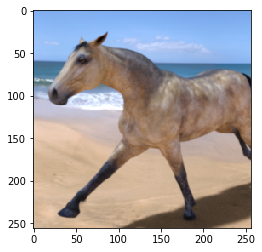

In [38]:
plt.imshow(X_train[101])

In [84]:
history = autoencoder.fit(x=X_train, y=X_train, validation_data=(X_test, X_test), epochs=100, callbacks=[TensorBoard()])

Train on 375 samples, validate on 125 samples
Epoch 1/100
375/375 [==============================] - 68s 182ms/sample - loss: 0.2144 - val_loss: 0.0958
Epoch 2/100
375/375 [==============================] - 48s 127ms/sample - loss: 0.0766 - val_loss: 0.0674
Epoch 3/100
375/375 [==============================] - 81s 215ms/sample - loss: 0.0589 - val_loss: 0.0515
Epoch 4/100
375/375 [==============================] - 60s 160ms/sample - loss: 0.0492 - val_loss: 0.0484
Epoch 5/100
375/375 [==============================] - 46s 123ms/sample - loss: 0.0449 - val_loss: 0.0446
Epoch 6/100
375/375 [==============================] - 46s 122ms/sample - loss: 0.0421 - val_loss: 0.0425
Epoch 7/100
375/375 [==============================] - 47s 126ms/sample - loss: 0.0391 - val_loss: 0.0397
Epoch 8/100
375/375 [==============================] - 46s 122ms/sample - loss: 0.0365 - val_loss: 0.0374
Epoch 9/100
375/375 [==============================] - 46s 122ms/sample - loss: 0.0345 - val_loss: 0.0362


375/375 [==============================] - 53s 140ms/sample - loss: 0.0083 - val_loss: 0.0173
Epoch 78/100
375/375 [==============================] - 75s 199ms/sample - loss: 0.0082 - val_loss: 0.0172
Epoch 79/100
375/375 [==============================] - 67s 180ms/sample - loss: 0.0083 - val_loss: 0.0173
Epoch 80/100
375/375 [==============================] - 59s 156ms/sample - loss: 0.0083 - val_loss: 0.0174
Epoch 81/100
375/375 [==============================] - 46s 123ms/sample - loss: 0.0081 - val_loss: 0.0175
Epoch 82/100
375/375 [==============================] - 46s 122ms/sample - loss: 0.0079 - val_loss: 0.0175
Epoch 83/100
375/375 [==============================] - 47s 125ms/sample - loss: 0.0078 - val_loss: 0.0173
Epoch 84/100
375/375 [==============================] - 46s 122ms/sample - loss: 0.0076 - val_loss: 0.0173
Epoch 85/100
375/375 [==============================] - 46s 122ms/sample - loss: 0.0074 - val_loss: 0.0174
Epoch 86/100
375/375 [============================

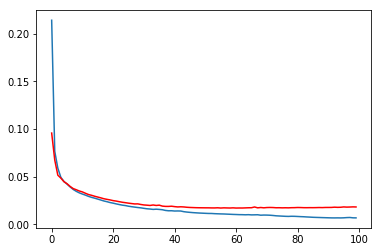

In [85]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"], c="r")

In [86]:
# history2 = autoencoder.fit(x=X_train, y=X_train, validation_data=(X_test, X_test), initial_epoch=100, epochs=200)

In [87]:
autoencoder.evaluate(X_test, X_test)

125/125 [==============================] - 5s 37ms/sample - loss: 0.0181


0.01808880499005318

In [104]:
def plot_de_encoded(i):
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(X_test[i])
    ax[0].set_title("Original")
    ax[1].imshow(decoder.predict(encoder.predict(X_test[i].reshape(1, 256, 256, 3)))[0])
    ax[1].set_title("Output")

W0810 18:16:32.627462 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


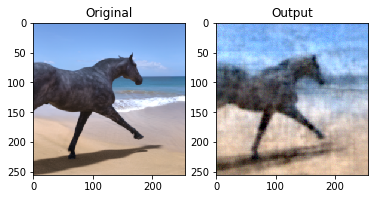

In [105]:
plot_de_encoded(0)

W0810 18:17:34.145986 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


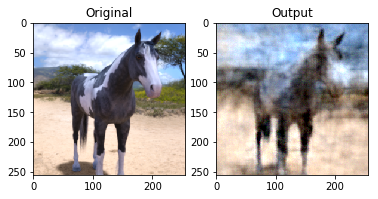

In [106]:
plot_de_encoded(1)

W0810 18:18:33.606130 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


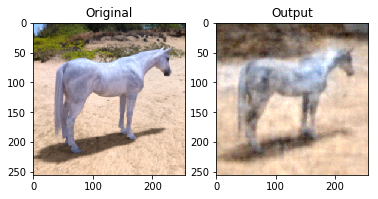

In [117]:
plot_de_encoded(100)

In [127]:
X_train.shape[0]

375

W0810 18:30:40.302433 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0810 18:30:40.355560 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0810 18:30:40.406029 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0810 18:30:40.454161 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0810 18:30:40.501254 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


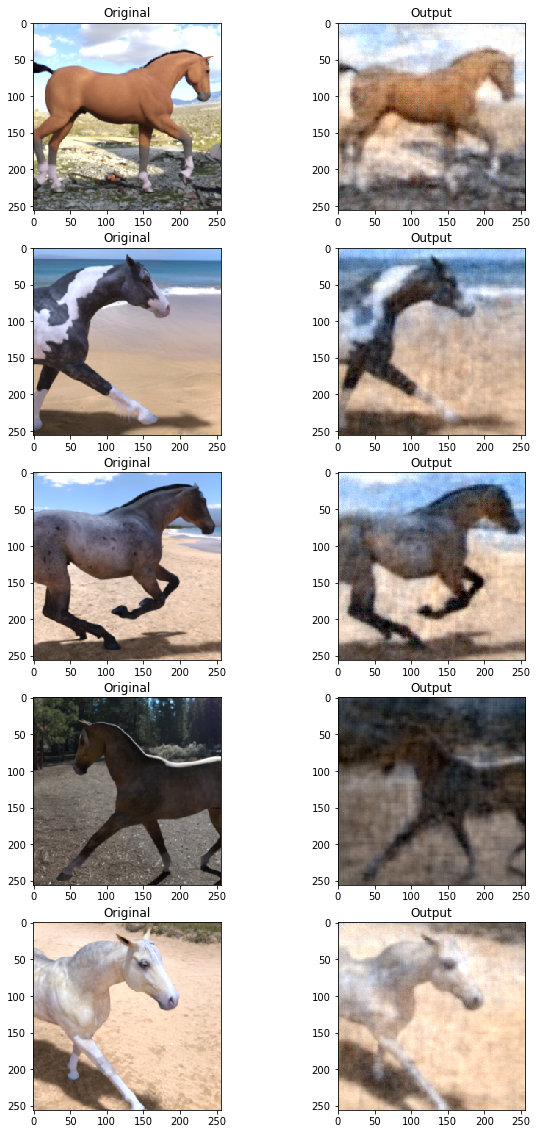

In [151]:
n_imgs = 5
fig, ax = plt.subplots(n_imgs, 2, figsize=(10,20))
for row, i in enumerate(np.random.randint(0, X_train.shape[0], n_imgs)):
#     i = int(i)
    ax[row,0].imshow(X_train[i])
    ax[row,0].set_title("Original")
    ax[row,1].imshow(decoder.predict(encoder.predict(X_train[i].reshape(1, 256, 256, 3)))[0])
    ax[row,1].set_title("Output")

W0810 18:33:50.355984 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


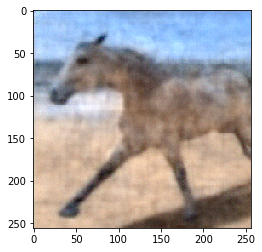

In [152]:
plt.imshow(decoder.predict(encoder.predict(X_train[101].reshape(1, 256, 256, 3)))[0])

W0810 18:35:11.495174 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0810 18:35:11.542495 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0810 18:35:11.596261 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0810 18:35:11.644949 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0810 18:35:11.693393 140615614527296 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


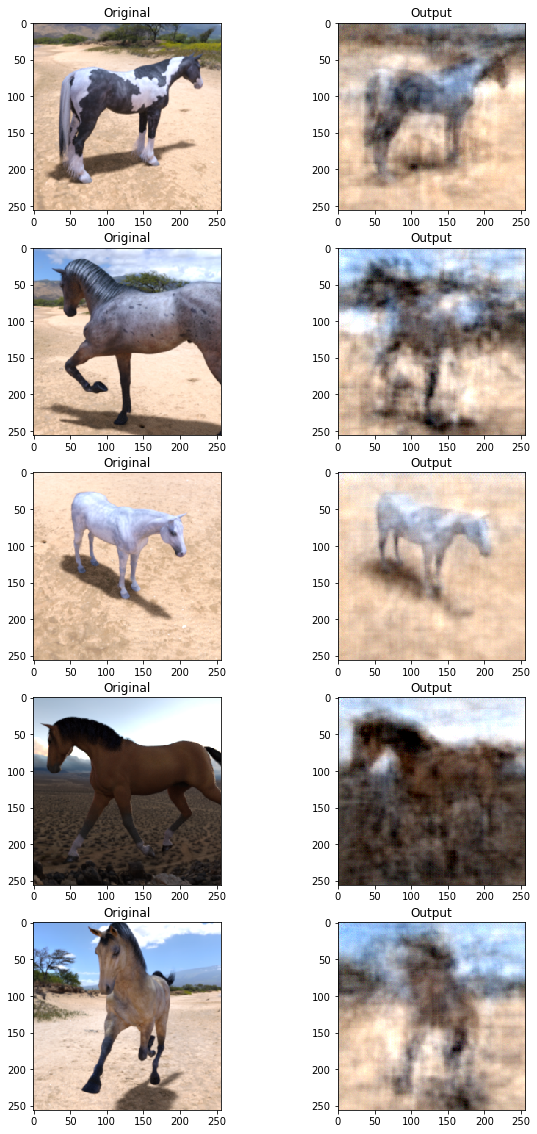

In [156]:
n_imgs = 5
fig, ax = plt.subplots(n_imgs, 2, figsize=(10,20))
for row, i in enumerate(np.random.randint(0, X_test.shape[0], n_imgs)):
    ax[row,0].imshow(X_test[i])
    ax[row,0].set_title("Original")
    ax[row,1].imshow(decoder.predict(encoder.predict(X_test[i].reshape(1, 256, 256, 3)))[0])
    ax[row,1].set_title("Output")

In [157]:
autoencoder.save("autoencoder_001.h5")

In [158]:
autoencoder.save_weights("autoencoder_weights_001.h5")